In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
print(os.listdir("../input"))
from time import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import pandas
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets.samples_generator import (make_blobs,
                                                make_circles,
                                                make_moons)
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics.cluster import completeness_score
from sklearn.metrics import confusion_matrix
from random import randint
from random import seed
seed(17)

['EastWestAirlines.csv']


Using TensorFlow backend.


In [2]:
EastWestAirlines = pd.read_csv("../input/EastWestAirlines.csv")
EastWestAirlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
EastWestAirlines = pd.get_dummies(data=EastWestAirlines, columns=['cc1_miles'])
EastWestAirlines = pd.get_dummies(data=EastWestAirlines, columns=['cc2_miles'])
EastWestAirlines = pd.get_dummies(data=EastWestAirlines, columns=['cc3_miles'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdb15f80828>,
      dtype=object)

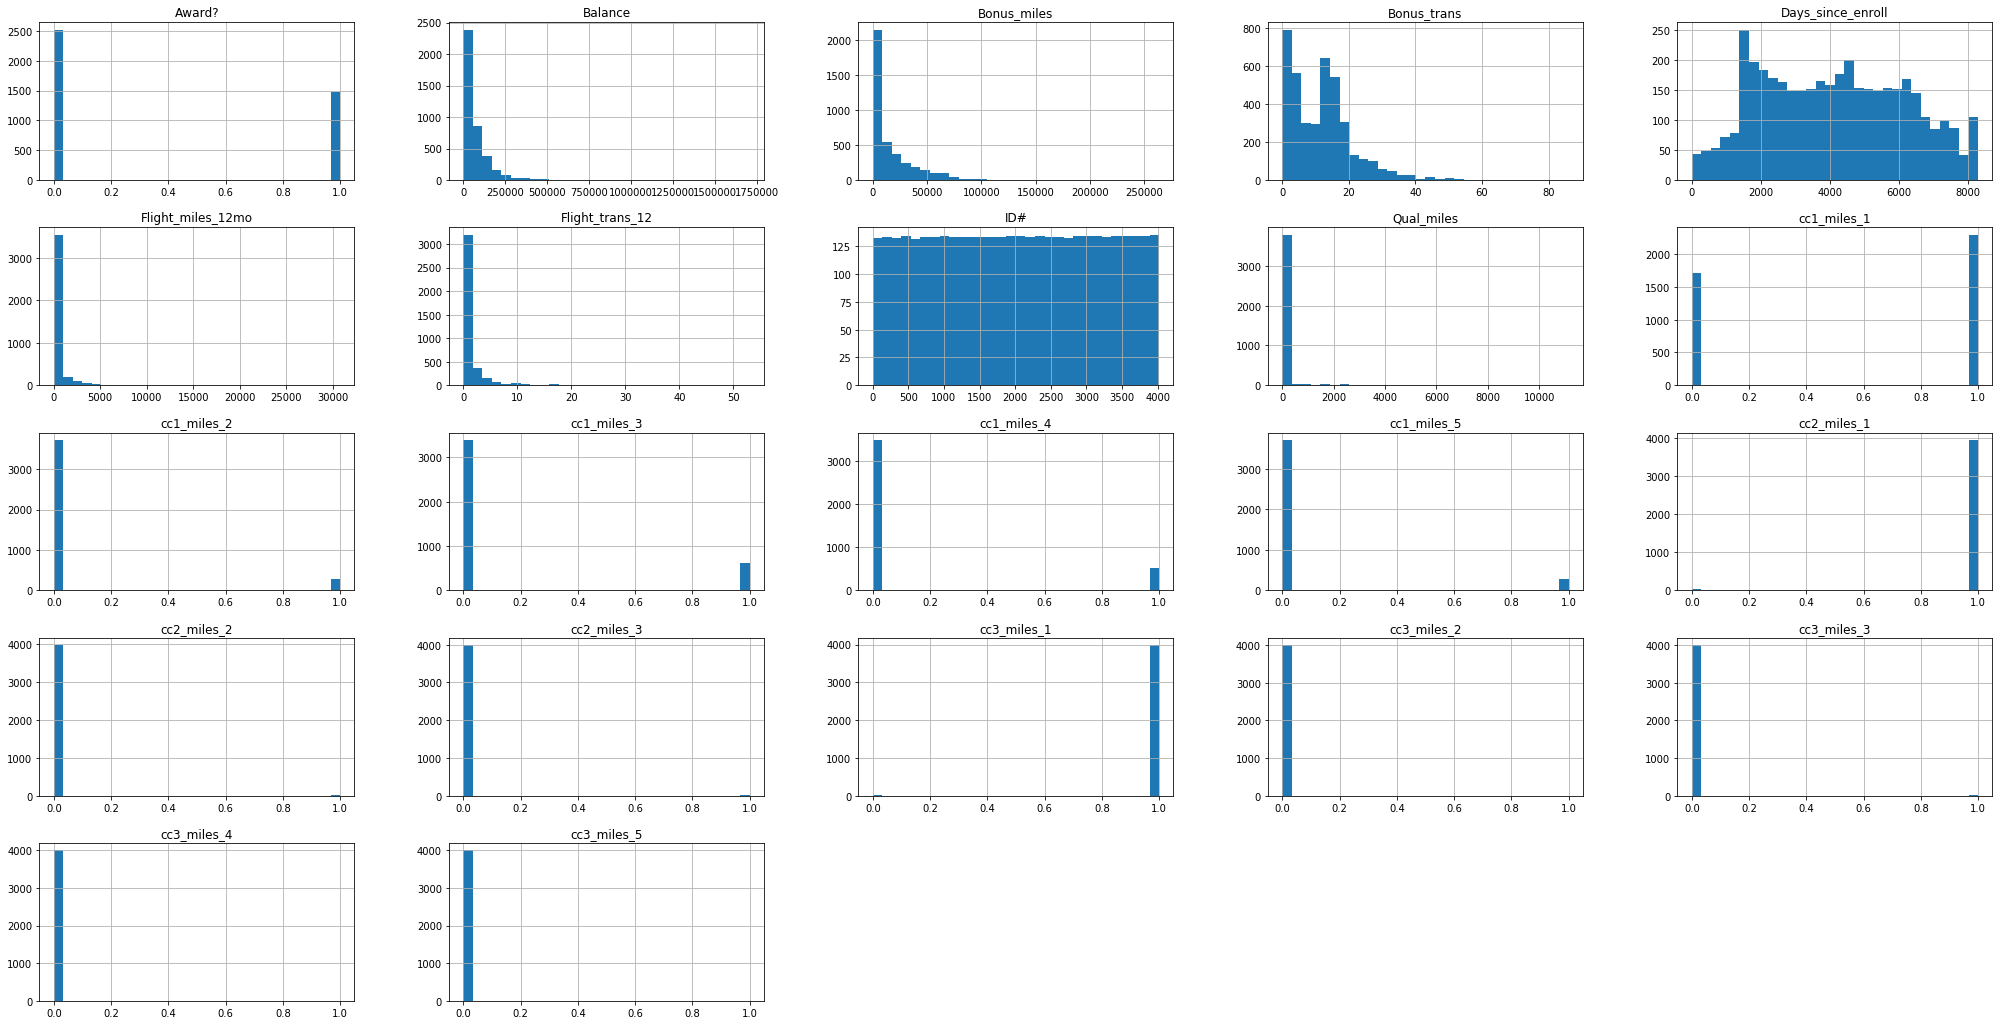

In [5]:

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 35
fig_size[1] = 18
EastWestAirlines.hist(bins=30)

In [6]:
del EastWestAirlines['ID#']

In [7]:
EastWestAirlines.isna().sum()

Balance              0
Qual_miles           0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
cc1_miles_1          0
cc1_miles_2          0
cc1_miles_3          0
cc1_miles_4          0
cc1_miles_5          0
cc2_miles_1          0
cc2_miles_2          0
cc2_miles_3          0
cc3_miles_1          0
cc3_miles_2          0
cc3_miles_3          0
cc3_miles_4          0
cc3_miles_5          0
dtype: int64

In [8]:
x = EastWestAirlines.drop(['Award?'], axis=1)
y = EastWestAirlines['Award?']

In [9]:
scaler = MinMaxScaler(feature_range=[0,1])
x = scaler.fit_transform(x)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [10]:
x.shape

(3999, 20)

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.3)

In [12]:
x_test.shape, x_train.shape,y_test.shape, y_train.shape

((1200, 20), (2799, 20), (1200,), (2799,))

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

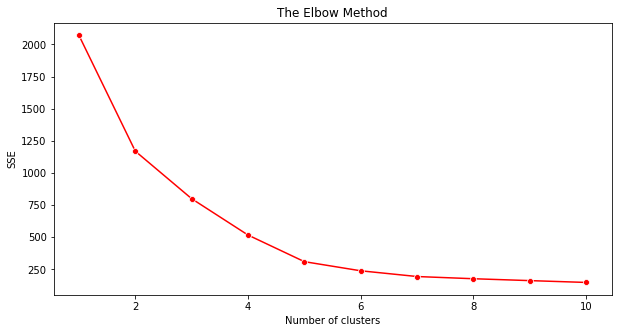

In [13]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42,max_iter = 1000)
    kmeans.fit(x_train)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)
    plt.figure(figsize=(10,5))

plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()


0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
2769    0
2770    0
2771    0
2772    0
2773    0
2774    0
2775    0
2776    0
2777    0
2778    0
2779    0
2780    0
2781    0
2782    0
2783    0
2784    0
2785    0
2786    0
2787    0
2788    0
2789    0
2790    0
2791    0
2792    0
2793    0
2794    0
2795    0
2796    0
2797    0
2798    0
Name: auto_clusters, Length: 2799, dtype: int32
0       1
1       0
2       1
3       1
4       1
5       1
6       0
7       0
8       0
9       0
10      1
11      1
12      0
13      1
14      0
15      1
16      0
17      1
18      0
19      0
20      0
21      1
22      0
23      0
24      1
25      0
26      0
27      1
28      1
29      0
       ..
2769    1
2770    0
2771    1
27

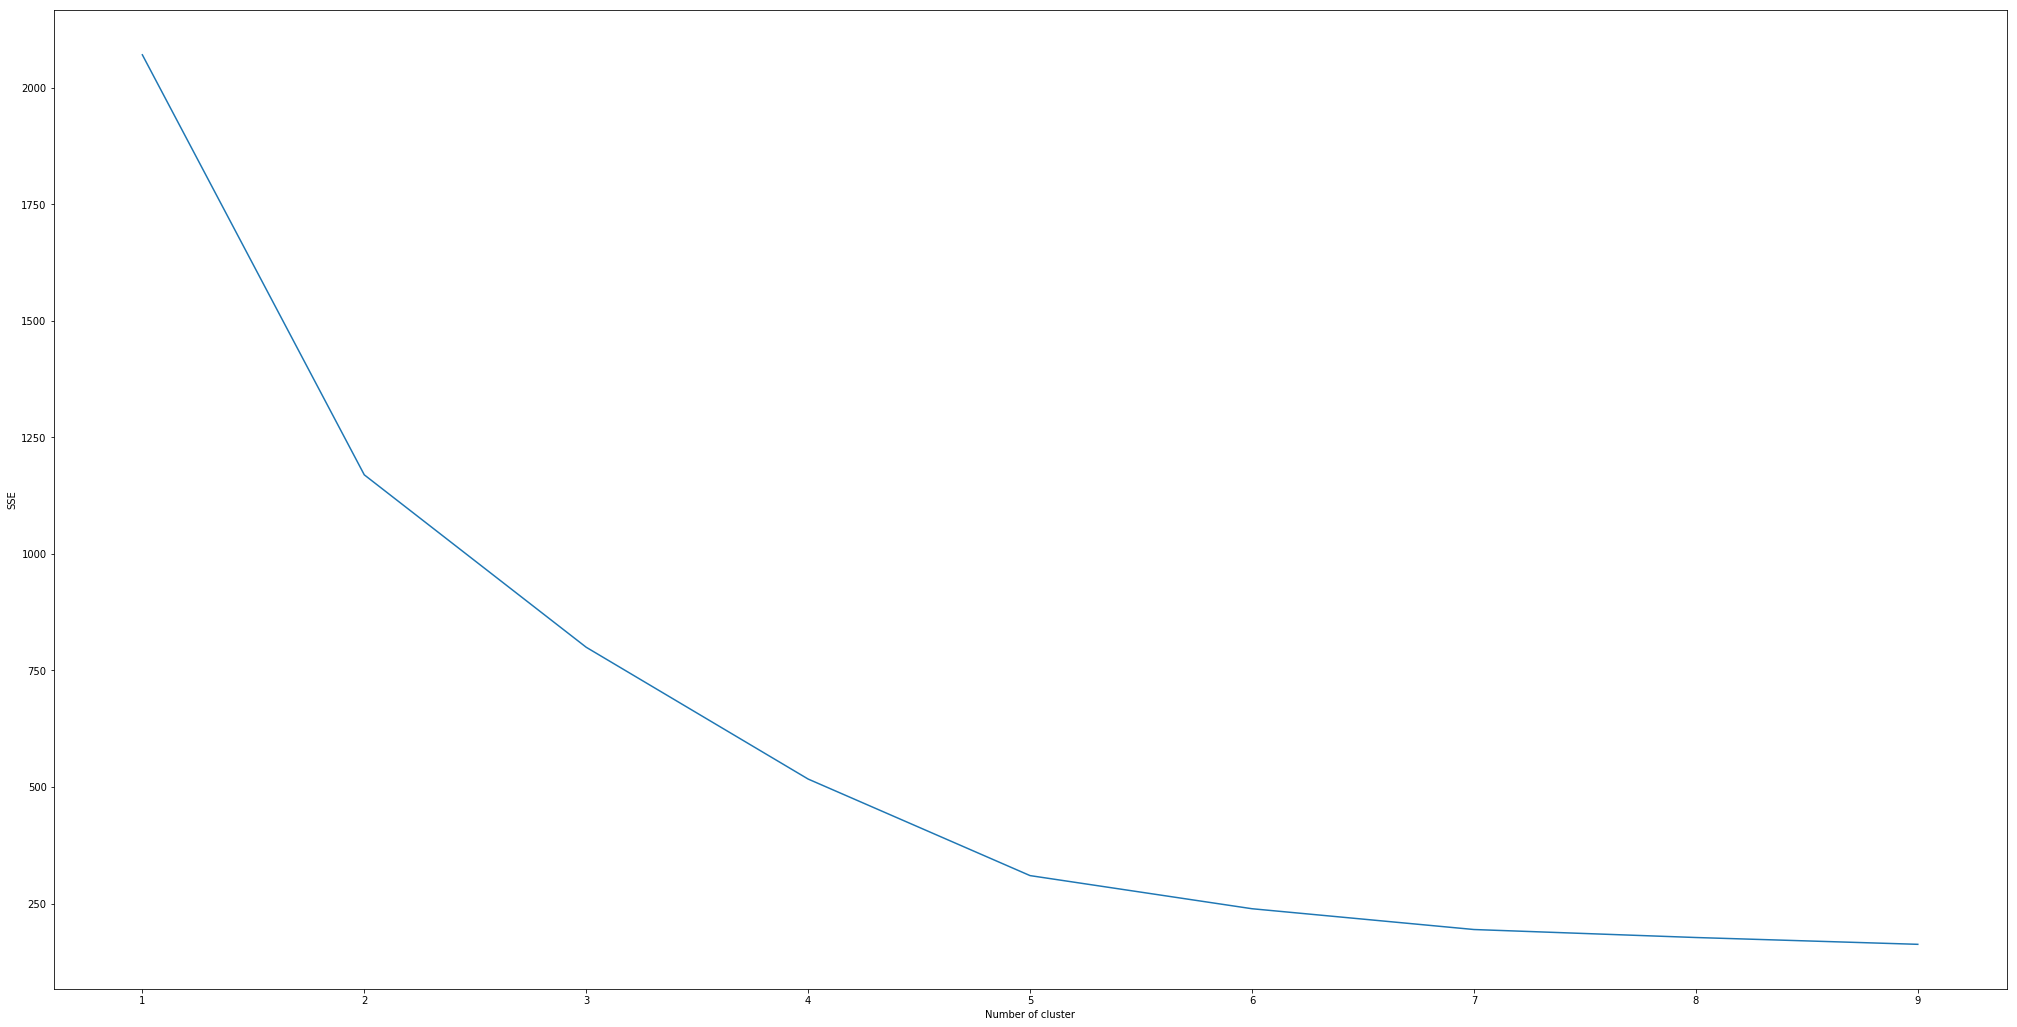

In [40]:
dummy = pd.DataFrame()

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(x_train)
    dummy["auto_clusters"] = kmeans.labels_
    #print(dummy["auto_clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

[0.8061654790584898, 0.5379304339441453, 0.42574674736441387, 0.3396514063888711, 0.26625952123522634, 0.21816575133593846, 0.20924745874852996, 0.19667732831685442, 0.18158086077371155]


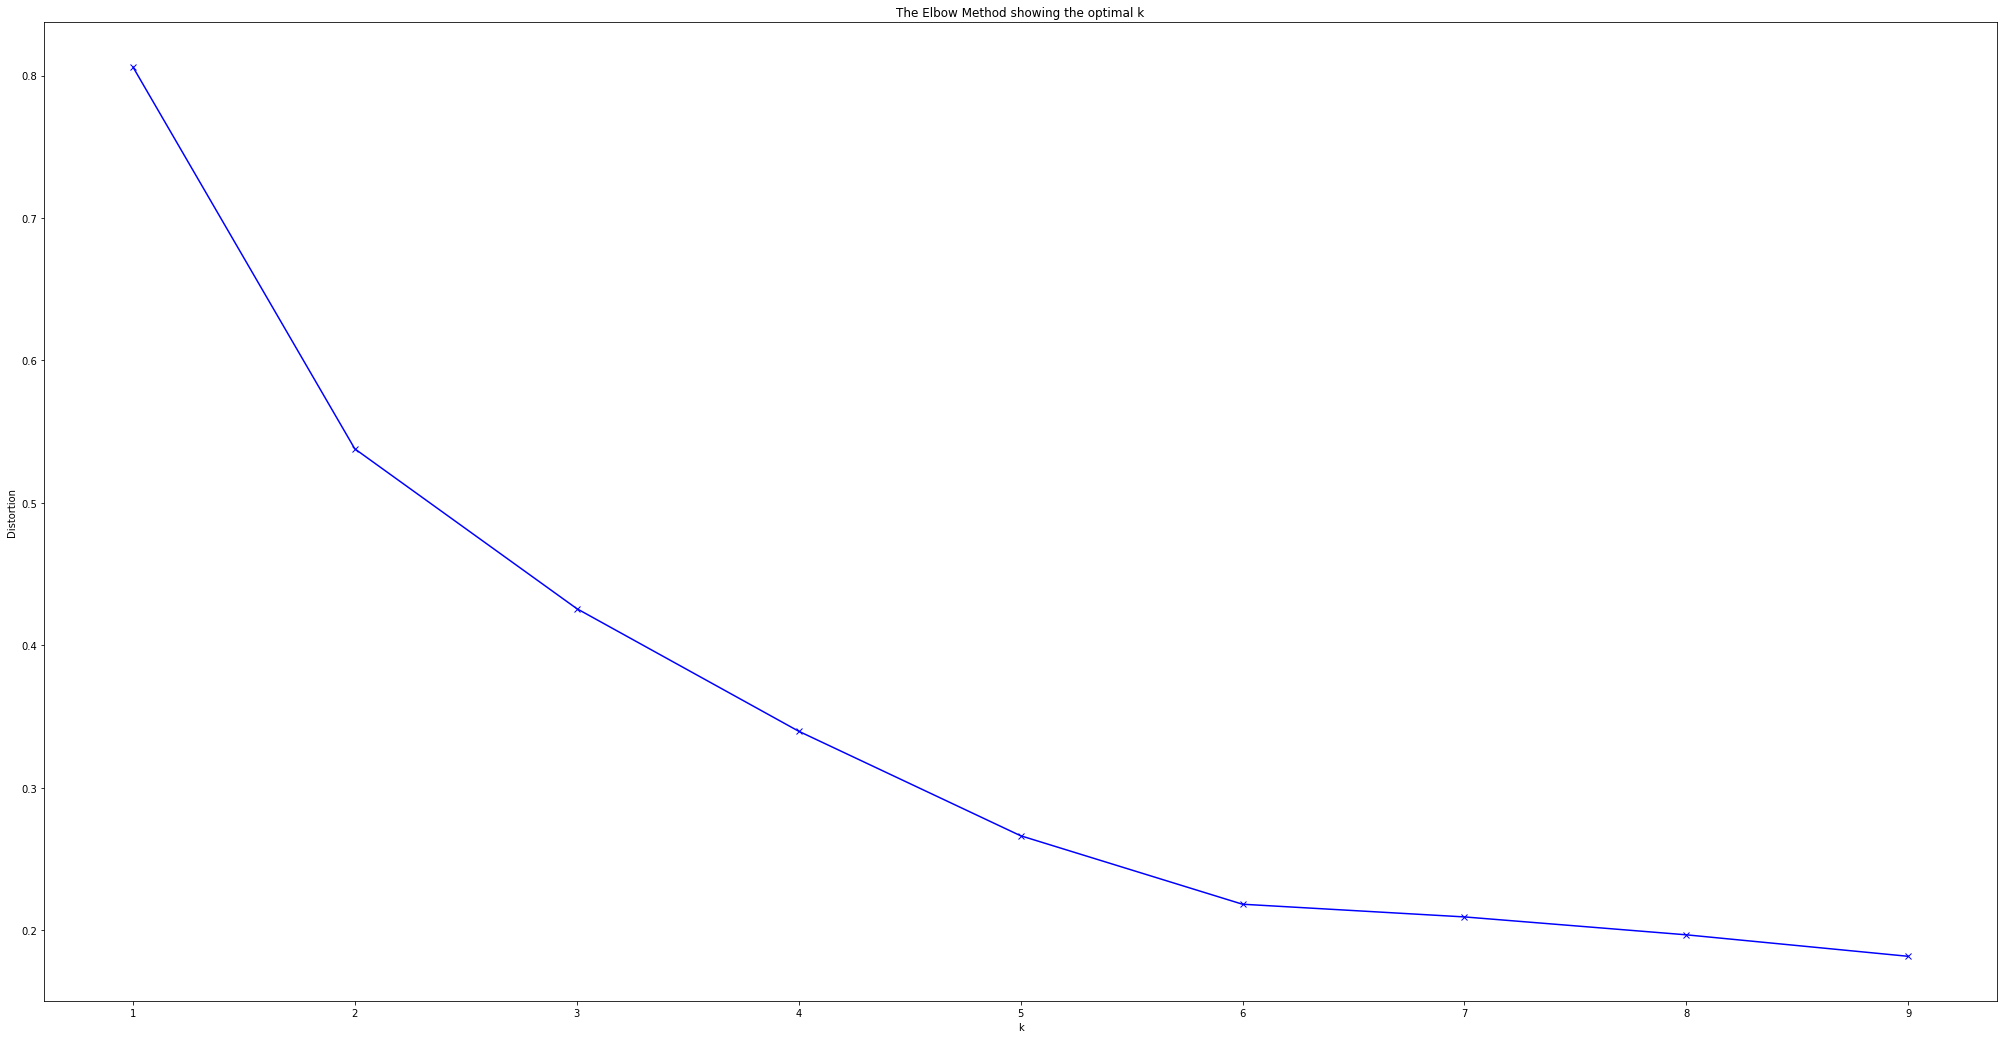

In [42]:
from scipy.spatial.distance import cdist
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters = k, init = 'k-means++', random_state = 42,max_iter = 1000).fit(x_train)
    kmeanModel.fit(x_train)
    distortions.append(sum(np.min(cdist(x_train, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / x_train.shape[0])
print(distortions)
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.5230323710607585
Accuracy Score  0.6591666666666667
Completeness Score  0.06786905257412602
For n_clusters = 3 The average silhouette_score is : 0.6173105875638177
Accuracy Score  0.49083333333333334
Completeness Score  0.05009161137387081
For n_clusters = 4 The average silhouette_score is : 0.6934169005435353
Accuracy Score  0.19333333333333333
Completeness Score  0.04196613707025245


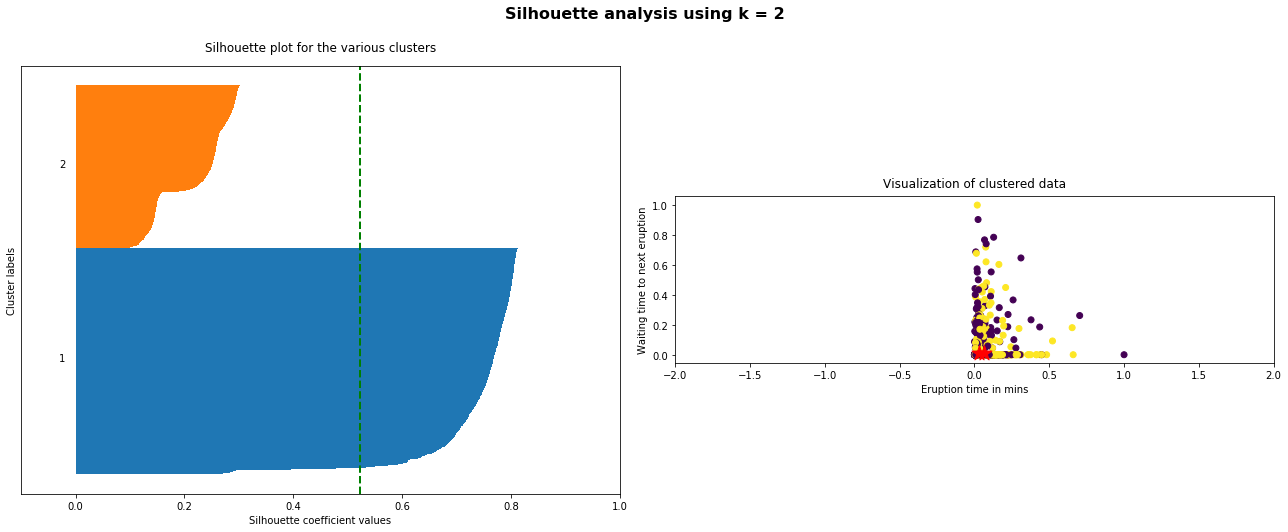

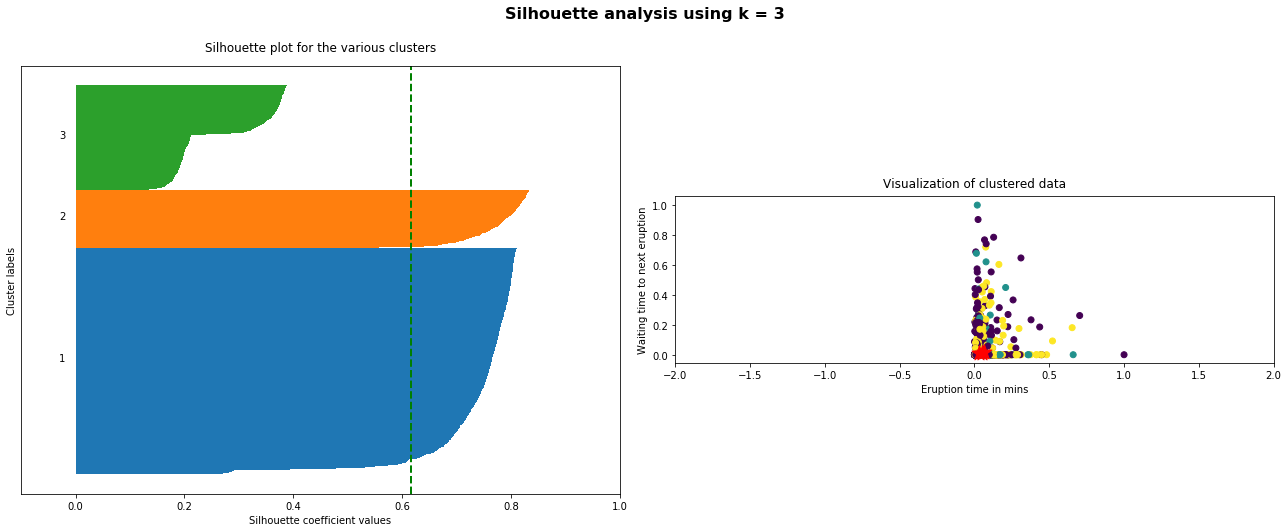

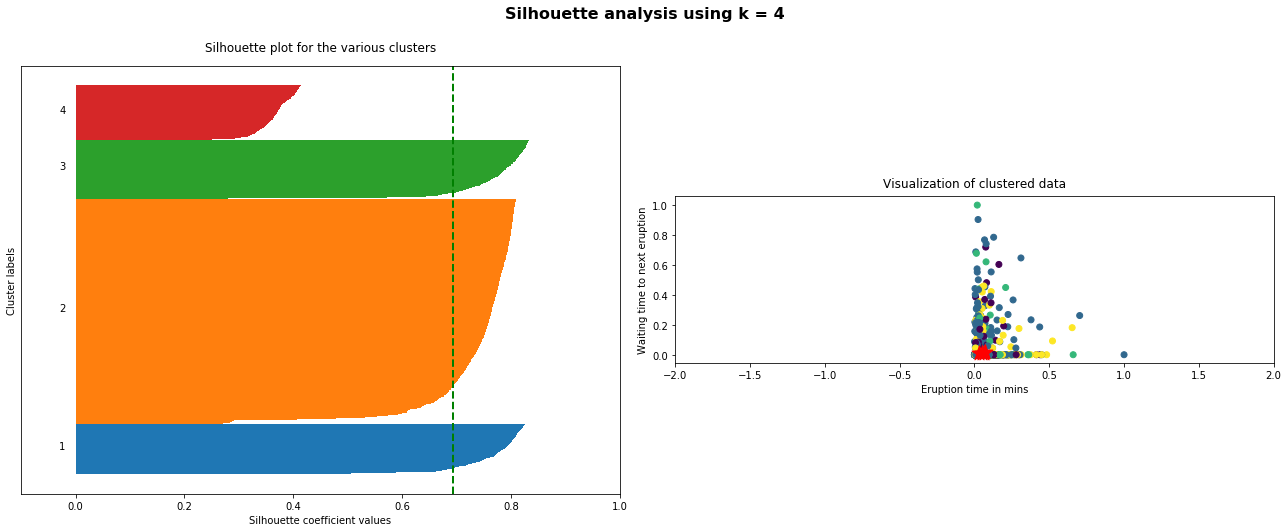

In [15]:
for i, k in enumerate([2, 3, 4]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k, max_iter = 1000)
    labels = km.fit_predict(x_train)
    y_label_test = km.predict(x_test)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(x_train, labels)
    
    
    
    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(x_train[:, 0], x_train[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-2, 2])
    ax2.set_xlim([-2, 2])
    ax2.set_xlabel('Eruption time in mins')
    ax2.set_ylabel('Waiting time to next eruption')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);
   
    silhouette_avg = silhouette_score(x_train, labels)
    print("For n_clusters =", k,
          "The average silhouette_score is :", silhouette_avg)
    #y_label_train = kmeans.labels_
    accurcyscore = accuracy_score(y_test,y_label_test)
    completenessscore =completeness_score(y_test, y_label_test)
    print("Accuracy Score ",accurcyscore)
    print("Completeness Score ",completenessscore)
   
    

In [ ]:
#Applying Auto Encoder with Relu 

In [16]:
input_data = Input(shape=(20,))
encoded = Dense(15, activation='relu')(input_data)
encoded = Dense(12, activation='relu')(encoded)
encoded = Dense(8, activation='relu')(encoded)
encoded = Dense(7, activation='relu')(encoded)
encoded = Dense(4, activation='relu')(encoded)
encoded = Dense(3, activation='relu')(encoded)

encoded = Dense(2, activation='relu')(encoded)

decoded = Dense(3, activation='relu')(encoded)
decoded = Dense(4, activation='relu')(decoded)
decoded = Dense(7, activation='relu')(decoded)
decoded = Dense(8, activation='relu')(decoded)
decoded = Dense(12, activation='relu')(decoded)
decoded = Dense(15, activation='relu')(decoded)
decoded = Dense(20, activation='sigmoid')(decoded)

Instructions for updating:
Colocations handled automatically by placer.


In [17]:
autoencoder = Model(input_data, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=42,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Instructions for updating:
Use tf.cast instead.
Train on 2799 samples, validate on 1200 samples
Epoch 1/42
2799/2799 [==============================] - 1s 445us/step - loss: 0.6869 - val_loss: 0.6799
Epoch 2/42
2799/2799 [==============================] - 0s 25us/step - loss: 0.6735 - val_loss: 0.6666
Epoch 3/42
2799/2799 [==============================] - 0s 25us/step - loss: 0.6602 - val_loss: 0.6535
Epoch 4/42
2799/2799 [==============================] - 0s 24us/step - loss: 0.6470 - val_loss: 0.6405
Epoch 5/42
2799/2799 [==============================] - 0s 24us/step - loss: 0.6341 - val_loss: 0.6278
Epoch 6/42
2799/2799 [==============================] - 0s 24us/step - loss: 0.6214 - val_loss: 0.6152
Epoch 7/42
2799/2799 [==============================] - 0s 23us/step - loss: 0.6088 - val_loss: 0.6029
Epoch 8/42
2799/2799 [==============================] - 0s 24us/step - loss: 0.5966 - val_loss: 0.5909
Epoch 9/42
2799/2799 [==============================] - 0s 24us/step - loss: 0.

In [18]:
autoencoder.summary()
encoder = Model(input_data, encoded)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 20)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 15)                315       
_________________________________________________________________
dense_2 (Dense)              (None, 12)                192       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_4 (Dense)              (None, 7)                 63        
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 32        
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 15        
__________

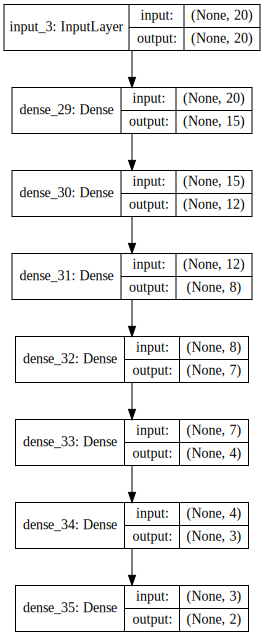

In [49]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(encoder, show_layer_names=True, show_shapes=True).create(prog='dot', format='svg'))

In [20]:
reduced_x_train = encoder.predict(x_train)
reduced_x_test = encoder.predict(x_test)
reduced_x_train.shape

(2799, 2)

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

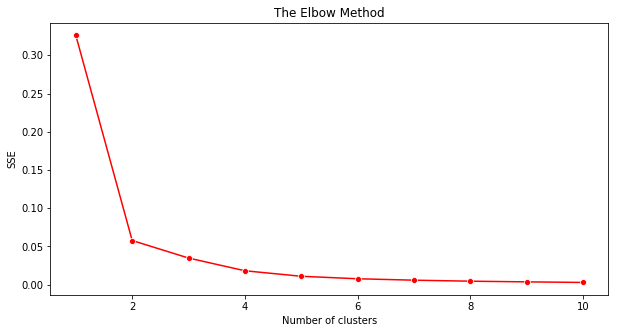

In [21]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42,max_iter = 1000)
    kmeans.fit(reduced_x_train)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)
    plt.figure(figsize=(10,5))

plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()


[0.4016978340200318, 0.06825725412102869, 0.053862497495225224, 0.031881111192477864, 0.027003004184531, 0.0219879797549848, 0.018515968670085613, 0.01555910503542696, 0.013789136789404712]


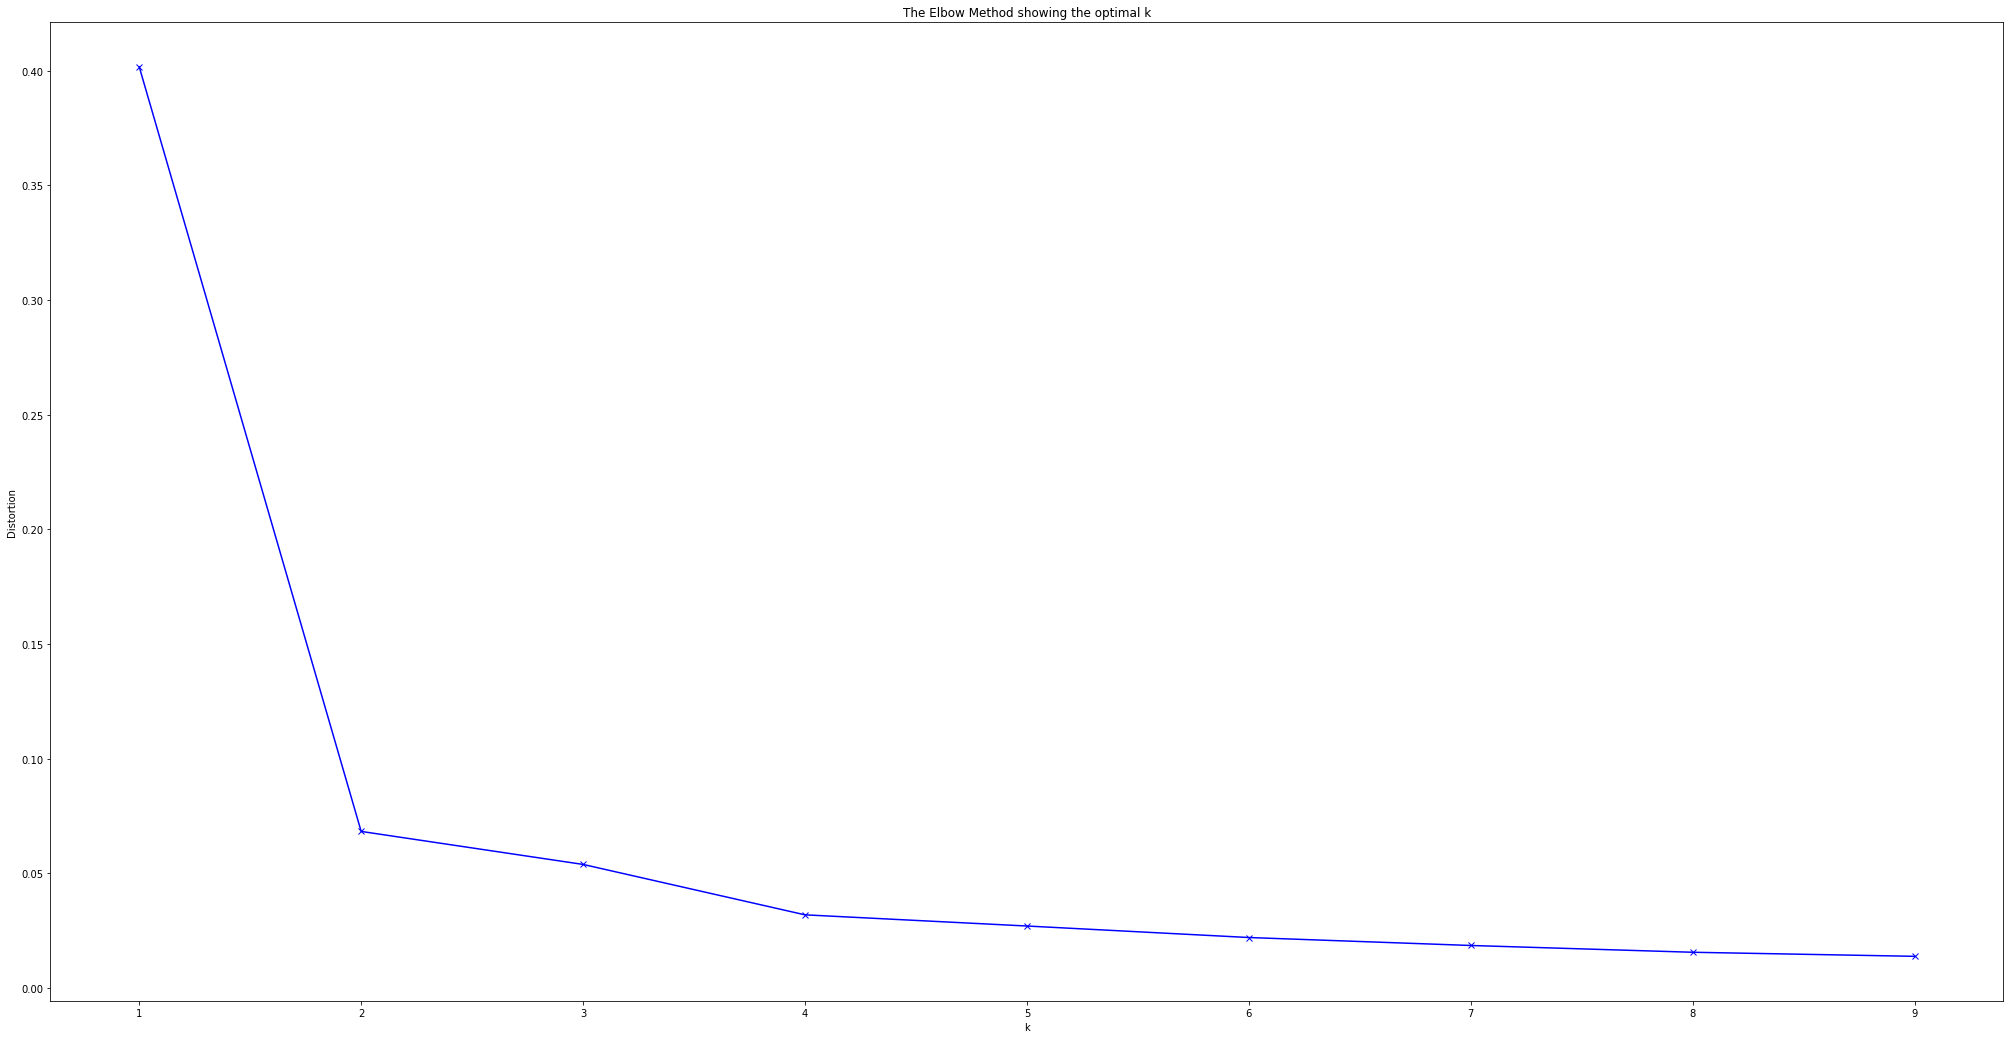

In [44]:
from scipy.spatial.distance import cdist
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters = k, init = 'k-means++', random_state = 42,max_iter = 1000).fit(reduced_x_train)
    kmeanModel.fit(reduced_x_train)
    distortions.append(sum(np.min(cdist(reduced_x_train, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / reduced_x_train.shape[0])
print(distortions)
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.79123056
Accuracy Score  0.66
Completeness Score  0.07465243188164061
For n_clusters = 3 The average silhouette_score is : 0.69132197
Accuracy Score  0.25333333333333335
Completeness Score  0.0475917304968282
For n_clusters = 4 The average silhouette_score is : 0.70008177
Accuracy Score  0.27666666666666667
Completeness Score  0.04699818373780161


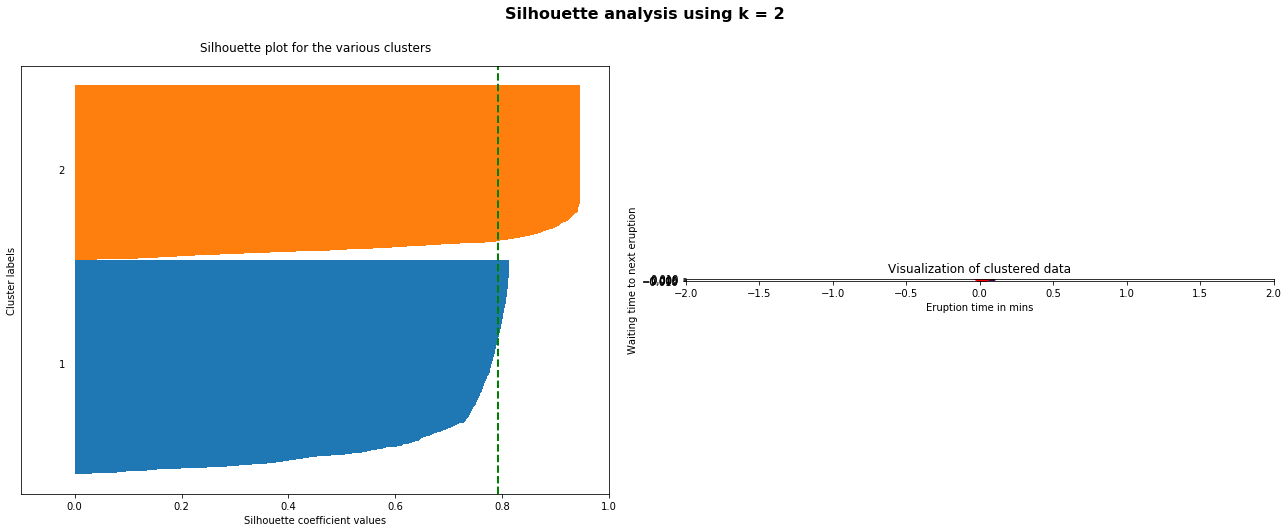

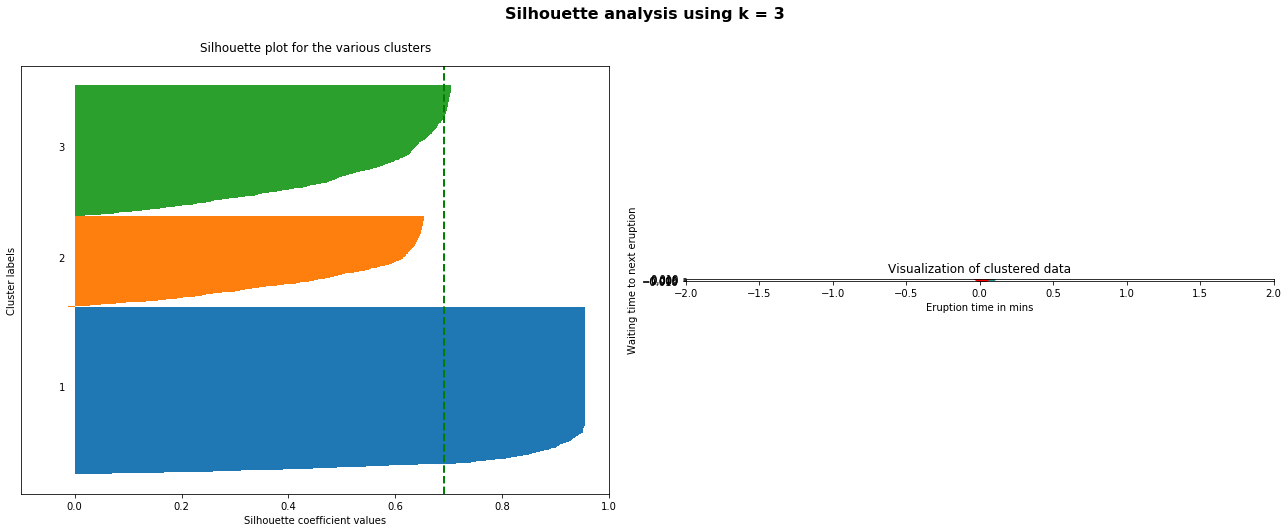

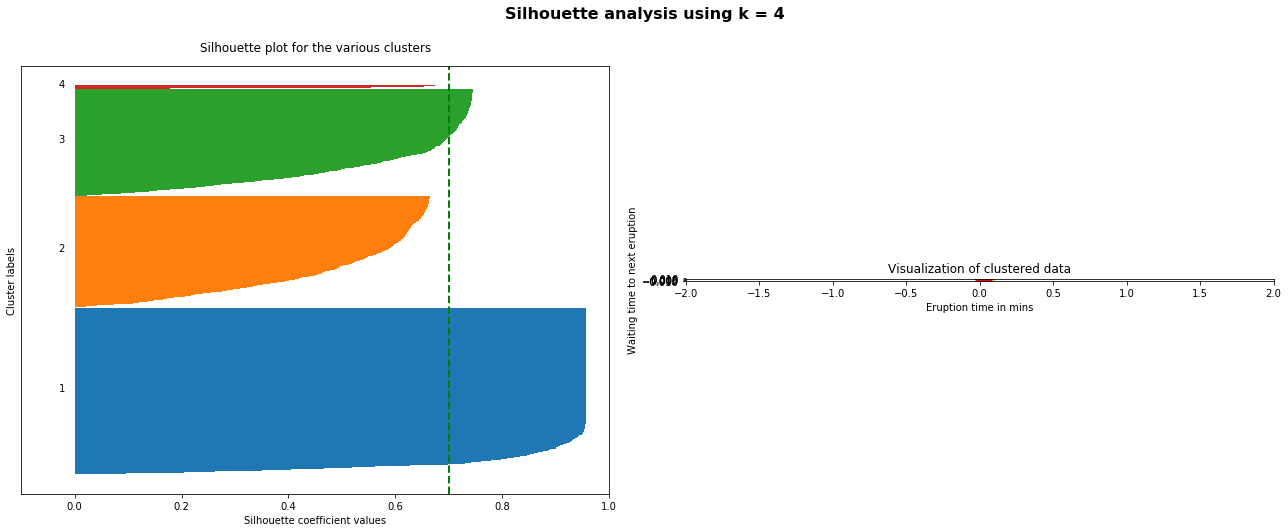

In [25]:
for i, k in enumerate([2, 3, 4]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k, max_iter = 1000)
    labels = km.fit_predict(reduced_x_train)
    y_label_test = km.predict(reduced_x_test)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(reduced_x_train, labels)
    
    
    
    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(reduced_x_train[:, 0], reduced_x_train[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-2, 2])
    ax2.set_xlim([-2, 2])
    ax2.set_xlabel('Eruption time in mins')
    ax2.set_ylabel('Waiting time to next eruption')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);
   
    silhouette_avg = silhouette_score(reduced_x_train, labels)
    print("For n_clusters =", k,
          "The average silhouette_score is :", silhouette_avg)
    #y_label_train = kmeans.labels_
    accurcyscore = accuracy_score(y_test,y_label_test)
    completenessscore =completeness_score(y_test, y_label_test)
    print("Accuracy Score ",accurcyscore)
    print("Completeness Score ",completenessscore)
    #print(confusion_matrix(y_test, y_label_test))

In [ ]:
#Applying AutoEncoder With Softmax 

In [27]:
input_data = Input(shape=(20,))
encoded = Dense(15, activation='relu')(input_data)
encoded = Dense(12, activation='relu')(encoded)
encoded = Dense(8, activation='relu')(encoded)
encoded = Dense(7, activation='relu')(encoded)
encoded = Dense(4, activation='relu')(encoded)
encoded = Dense(3, activation='relu')(encoded)

encoded = Dense(2, activation='softmax')(encoded)

decoded = Dense(3, activation='relu')(encoded)
decoded = Dense(4, activation='relu')(decoded)
decoded = Dense(7, activation='relu')(decoded)
decoded = Dense(8, activation='relu')(decoded)
decoded = Dense(12, activation='relu')(decoded)
decoded = Dense(15, activation='relu')(decoded)
decoded = Dense(20, activation='sigmoid')(decoded)


In [28]:
autoencoder = Model(input_data, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=42,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 2799 samples, validate on 1200 samples
Epoch 1/42
2799/2799 [==============================] - 1s 518us/step - loss: 0.6821 - val_loss: 0.6667
Epoch 2/42
2799/2799 [==============================] - 0s 34us/step - loss: 0.6189 - val_loss: 0.4746
Epoch 3/42
2799/2799 [==============================] - 0s 33us/step - loss: 0.2680 - val_loss: 0.2083
Epoch 4/42
2799/2799 [==============================] - 0s 35us/step - loss: 0.2016 - val_loss: 0.2035
Epoch 5/42
2799/2799 [==============================] - 0s 38us/step - loss: 0.1995 - val_loss: 0.2025
Epoch 6/42
2799/2799 [==============================] - 0s 35us/step - loss: 0.1985 - val_loss: 0.2021
Epoch 7/42
2799/2799 [==============================] - 0s 32us/step - loss: 0.1983 - val_loss: 0.2017
Epoch 8/42
2799/2799 [==============================] - 0s 32us/step - loss: 0.1979 - val_loss: 0.2017
Epoch 9/42
2799/2799 [==============================] - 0s 33us/step - loss: 0.1976 - val_loss: 0.2014
Epoch 10/42
2799/2799 [=

In [29]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 20)                0         
_________________________________________________________________
dense_29 (Dense)             (None, 15)                315       
_________________________________________________________________
dense_30 (Dense)             (None, 12)                192       
_________________________________________________________________
dense_31 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_32 (Dense)             (None, 7)                 63        
_________________________________________________________________
dense_33 (Dense)             (None, 4)                 32        
_________________________________________________________________
dense_34 (Dense)             (None, 3)                 15        
__________

In [30]:
encoder = Model(input_data, encoded)

In [31]:
reduced_x_train = encoder.predict(x_train)
reduced_x_test = encoder.predict(x_test)

In [32]:
reduced_x_train.shape,reduced_x_test.shape

((2799, 2), (1200, 2))

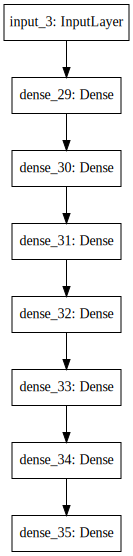

In [34]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(encoder).create(prog='dot', format='svg'))

For n_clusters = 2 The average silhouette_score is : 0.8839485
Accuracy Score  0.6608333333333334
Completeness Score  0.07254318296483356
For n_clusters = 3 The average silhouette_score is : 0.7493007
Accuracy Score  0.5925
Completeness Score  0.06848504886304196
For n_clusters = 4 The average silhouette_score is : 0.7011203
Accuracy Score  0.18416666666666667
Completeness Score  0.056689812543646016


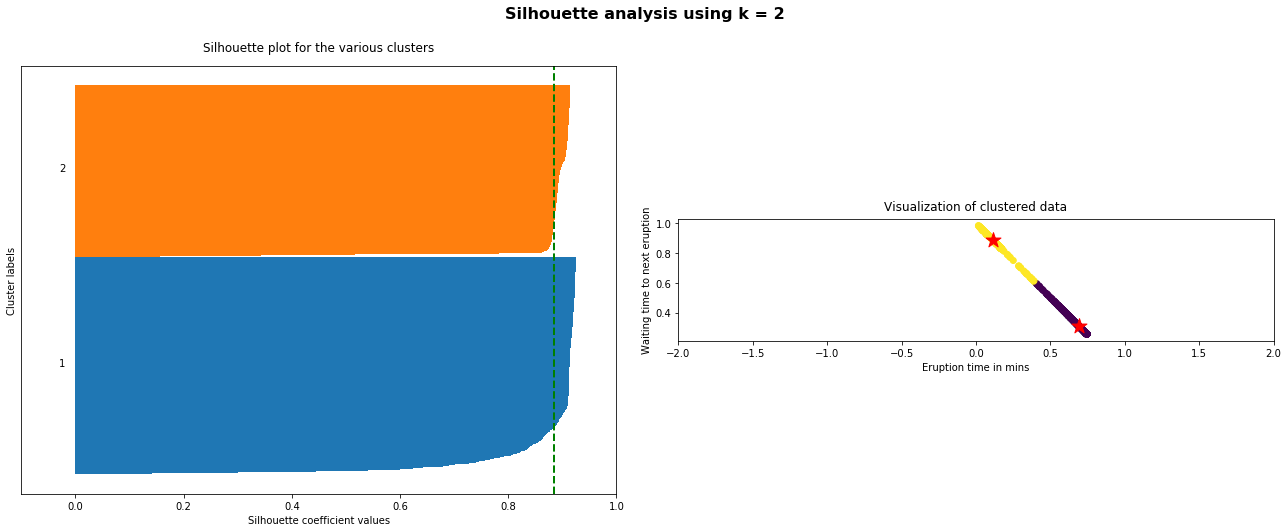

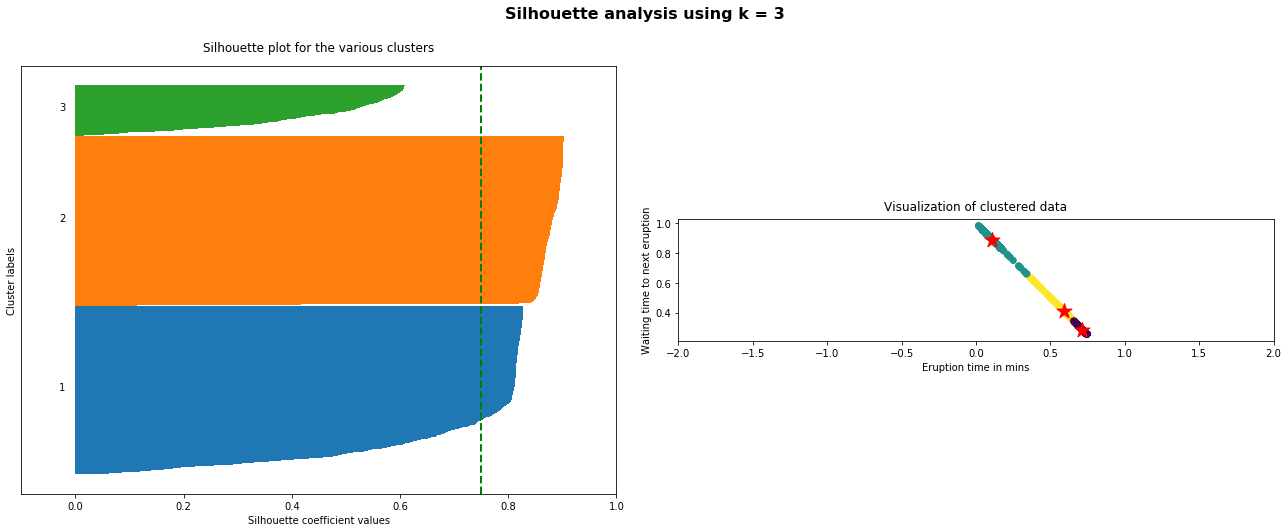

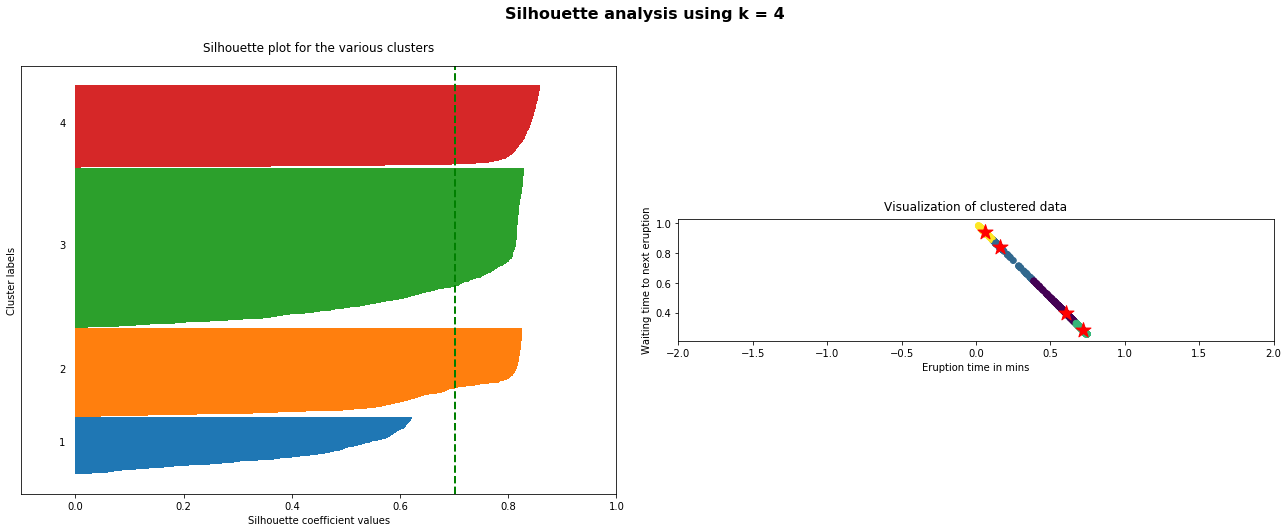

In [35]:
for i, k in enumerate([2, 3, 4]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k, max_iter = 1000)
    labels = km.fit_predict(reduced_x_train)
    y_label_test = km.predict(reduced_x_test)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(reduced_x_train, labels)
    
    
    
    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(reduced_x_train[:, 0], reduced_x_train[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-2, 2])
    ax2.set_xlim([-2, 2])
    ax2.set_xlabel('Eruption time in mins')
    ax2.set_ylabel('Waiting time to next eruption')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);
   
    silhouette_avg = silhouette_score(reduced_x_train, labels)
    print("For n_clusters =", k,
          "The average silhouette_score is :", silhouette_avg)
    #y_label_train = kmeans.labels_
    accurcyscore = accuracy_score(y_test,y_label_test)
    completenessscore =completeness_score(y_test, y_label_test)
    print("Accuracy Score ",accurcyscore)
    print("Completeness Score ",completenessscore)

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

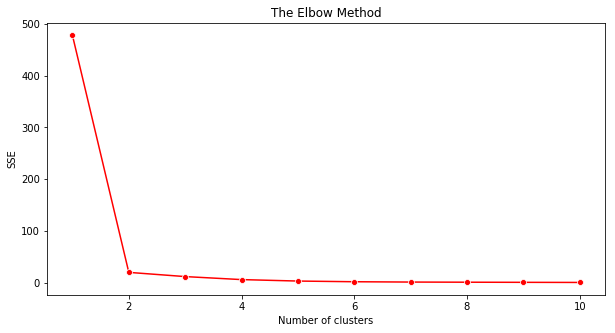

In [36]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42,max_iter = 1000)
    kmeans.fit(reduced_x_train)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)
    plt.figure(figsize=(10,5))

plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

[0.4016978340200318, 0.06825725412102869, 0.053862497495225224, 0.031881111192477864, 0.027003004184531, 0.0219879797549848, 0.018515968670085613, 0.01555910503542696, 0.013789136789404712]


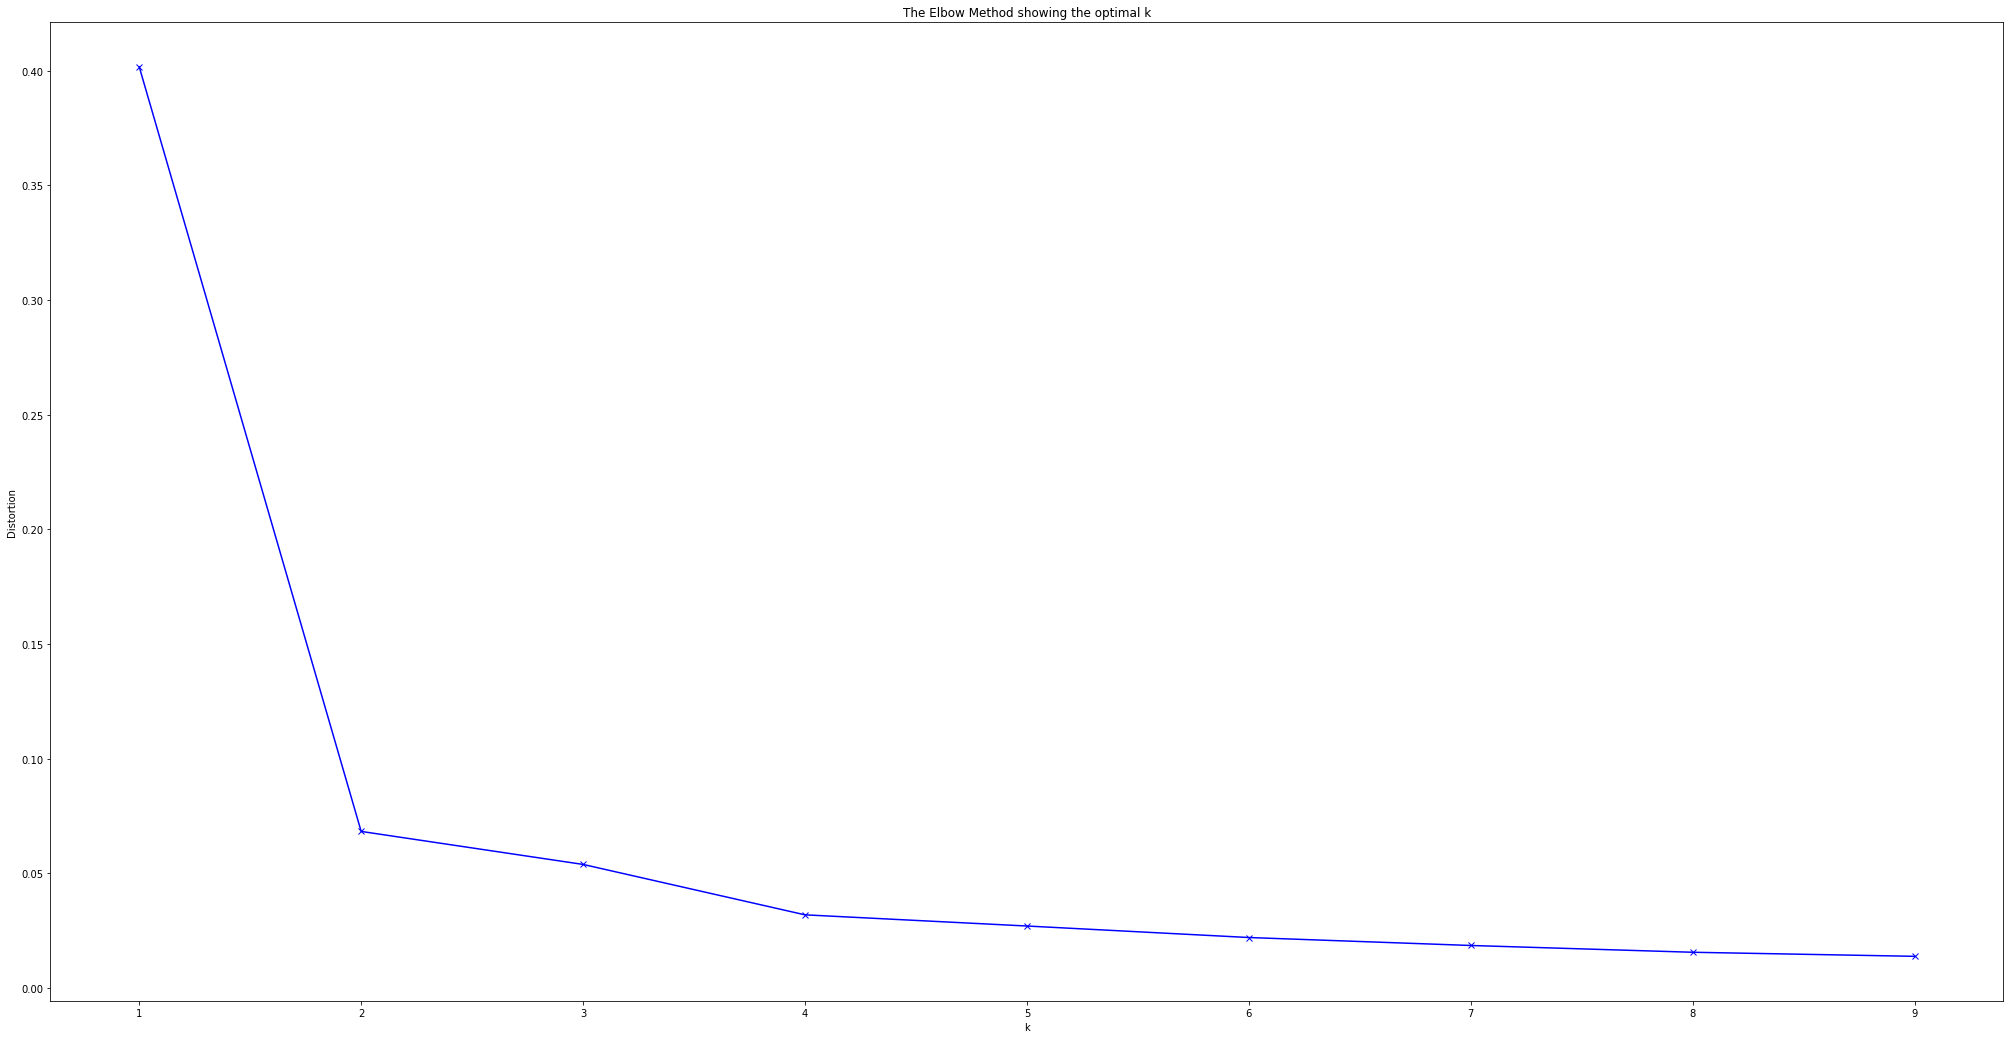

In [45]:
from scipy.spatial.distance import cdist
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters = k, init = 'k-means++', random_state = 42,max_iter = 1000).fit(reduced_x_train)
    kmeanModel.fit(reduced_x_train)
    distortions.append(sum(np.min(cdist(reduced_x_train, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / reduced_x_train.shape[0])
print(distortions)
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()